In [1]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Input, LSTM, RepeatVector
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO

2025-03-26 11:41:57.552545: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-26 11:41:57.570370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742989317.590500  239548 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742989317.596732  239548 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742989317.611294  239548 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
df = pd.read_csv('/teamspace/studios/this_studio/examples/pamap2_HAR_raw.csv')

In [3]:
df=df.head(25000)

In [ ]:
df.head()

timestamp  heart_rate  IMU_hand_temperature  IMU_hand_3D_acceleration_1  \
0       0.00         2.0                 3.000                     4.00000   
1      37.66         NaN                30.375                     2.21530   
2      37.67         NaN                30.375                     2.29196   
3      37.68         NaN                30.375                     2.29090   
4      37.69         NaN                30.375                     2.21800   

   IMU_hand_3D_acceleration_2  IMU_hand_3D_acceleration_3  \
0                     5.00000                     6.00000   
1                     8.27915                     5.58753   
2                     7.67288                     5.74467   
3                     7.14240                     5.82342   
4                     7.14365                     5.89930   

   IMU_hand_3D_acceleration_4  IMU_hand_3D_acceleration_5  \
0                     7.00000                     8.00000   
1                     2.24689                     8.55387   
2                     2.27373                     8.14592   
3                     2.26966                     7.66268   
4                     2.22177                     7.25535   

   IMU_hand_3D_acceleration_6  IMU_hand_3D_gyroscope_1  ...  \
0                     9.00000                10.000000  ...   
1                     5.77143                -0.004750  ...   
2                     5.78739                -0.171710  ...   
3                     5.78846                -0.238241  ...   
4                     5.88000                -0.192912  ...   

   IMU_ankle_3D_gyroscope_3  IMU_ankle_3D_magnetometer_1  \
0                 46.000000                      47.0000   
1                  0.001752                     -61.1081   
2                  0.006007                     -60.8916   
3                 -0.004882                     -60.3407   
4                  0.026950                     -60.7646   

   IMU_ankle_3D_magnetometer_2  IMU_ankle_3D_magnetometer_3  \
0                      48.0000                      49.0000   
1                     -36.8636                     -58.3696   
2                     -36.3197                     -58.3656   
3                     -35.7842                     -58.6119   
4                     -37.1028                     -57.8799   

   IMU_ankle_orientation_1  IMU_ankle_orientation_2  IMU_ankle_orientation_3  \
0                     50.0                     51.0                     52.0   
1                      1.0                      0.0                      0.0   
2                      1.0                      0.0                      0.0   
3                      1.0                      0.0                      0.0   
4                      1.0                      0.0                      0.0   

   IMU_ankle_orientation_4  activityID  activity_name  
0                     53.0         1.0          Lying  
1                      0.0         1.0          Lying  
2                      0.0         1.0          Lying  
3                      0.0         1.0          Lying  
4                      0.0         1.0          Lying  

[5 rows x 55 columns]

In [5]:
df.describe()

timestamp   heart_rate  IMU_hand_temperature  \
count  25000.000000  2287.000000          24997.000000   
mean     162.643494    87.945343             31.233926   
std       72.173228     7.520639              0.439316   
min        0.000000     2.000000              3.000000   
25%      100.147500    82.000000             30.937500   
50%      162.645000    86.000000             31.312500   
75%      225.142500    91.000000             31.562500   
max      287.640000   107.000000             31.875000   

       IMU_hand_3D_acceleration_1  IMU_hand_3D_acceleration_2  \
count                24997.000000                24997.000000   
mean                     4.443440                    2.474244   
std                      3.094593                    3.747164   
min                    -14.090400                   -9.313420   
25%                      1.247890                    1.228200   
50%                      5.976940                    1.912230   
75%                      7.145550                    5.623690   
max                     11.707600                   13.514400   

       IMU_hand_3D_acceleration_3  IMU_hand_3D_acceleration_4  \
count                24997.000000                24997.000000   
mean                     3.631801                    4.480034   
std                      5.785013                    3.120743   
min                    -15.184400                  -14.050700   
25%                      5.150830                    1.287700   
50%                      6.261090                    6.032940   
75%                      6.532970                    7.228940   
max                     10.436800                   11.751600   

       IMU_hand_3D_acceleration_5  IMU_hand_3D_acceleration_6  \
count                24997.000000                24997.000000   
mean                     2.468255                    3.769476   
std                      3.739146                    5.843022   
min                     -9.329430                  -14.993400   
25%                      1.254490                    5.281970   
50%                      1.845810                    6.597490   
75%                      5.669150                    6.748510   
max                     13.375300                   10.442800   

       IMU_hand_3D_gyroscope_1  ...  IMU_ankle_3D_gyroscope_2  \
count             24997.000000  ...              24997.000000   
mean                  0.007949  ...                 -0.002106   
std                   0.271120  ...                  0.301210   
min                  -3.250640  ...                 -1.152890   
25%                  -0.018436  ...                 -0.021684   
50%                   0.001184  ...                 -0.005120   
75%                   0.021286  ...                  0.011920   
max                  10.000000  ...                 45.000000   

       IMU_ankle_3D_gyroscope_3  IMU_ankle_3D_magnetometer_1  \
count              24997.000000                 24997.000000   
mean                   0.011478                   -19.588359   
std                    0.334469                     9.684293   
min                   -1.024640                  -117.268000   
25%                   -0.009583                   -20.217600   
50%                    0.002438                   -18.985400   
75%                    0.014430                   -14.336900   
max                   46.000000                    47.000000   

       IMU_ankle_3D_magnetometer_2  IMU_ankle_3D_magnetometer_3  \
count                 24997.000000                 24997.000000   
mean                     36.317452                     1.904401   
std                      18.850296                    21.189988   
min                     -57.557200                   -60.519300   
25%                      37.807600                    -6.018060   
50%                      44.322300                    -2.516010   
75%                      44.852400                     0.324129   
max                      48.00

In [6]:
sensor_columns = [col for col in df.columns if col not in ['timestamp', 'activityID', 'activity_name']]
sensor_data = df[sensor_columns]

In [7]:
#Linear Interpolation, Feature Engineering and Dropping NANs
sensor_data = sensor_data.interpolate(method='linear', axis=0)
sensor_data = sensor_data.dropna()

sensor_data['hand_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_acceleration_1']**2 +
    sensor_data['IMU_hand_3D_acceleration_2']**2 +
    sensor_data['IMU_hand_3D_acceleration_3']**2
)
sensor_data['chest_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_acceleration_1']**2 +
    sensor_data['IMU_chest_3D_acceleration_2']**2 +
    sensor_data['IMU_chest_3D_acceleration_3']**2
)
sensor_data['chest_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_gyroscope_1']**2 +
    sensor_data['IMU_chest_3D_gyroscope_2']**2 +
    sensor_data['IMU_chest_3D_gyroscope_3']**2
)
sensor_data['chest_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_magnetometer_1']**2 +
    sensor_data['IMU_chest_3D_magnetometer_2']**2 +
    sensor_data['IMU_chest_3D_magnetometer_3']**2
)
sensor_data['ankle_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_acceleration_1']**2 +
    sensor_data['IMU_ankle_3D_acceleration_2']**2 +
    sensor_data['IMU_ankle_3D_acceleration_3']**2
)
sensor_data['ankle_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_gyroscope_1']**2 +
    sensor_data['IMU_ankle_3D_gyroscope_2']**2 +
    sensor_data['IMU_ankle_3D_gyroscope_3']**2
)
sensor_data['ankle_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_magnetometer_1']**2 +
    sensor_data['IMU_ankle_3D_magnetometer_2']**2 +
    sensor_data['IMU_ankle_3D_magnetometer_3']**2
)
sensor_data['hand_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_hand_3D_acceleration_4']**2 +
    sensor_data['IMU_hand_3D_acceleration_5']**2 +
    sensor_data['IMU_hand_3D_acceleration_6']**2
)
sensor_data['hand_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_gyroscope_1']**2 +
    sensor_data['IMU_hand_3D_gyroscope_2']**2 +
    sensor_data['IMU_hand_3D_gyroscope_3']**2
)
sensor_data['hand_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_magnetometer_1']**2 +
    sensor_data['IMU_hand_3D_magnetometer_2']**2 +
    sensor_data['IMU_hand_3D_magnetometer_3']**2
)
sensor_data['chest_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_chest_3D_acceleration_4']**2 +
    sensor_data['IMU_chest_3D_acceleration_5']**2 +
    sensor_data['IMU_chest_3D_acceleration_6']**2
)
sensor_data['ankle_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_ankle_3D_acceleration_4']**2 +
    sensor_data['IMU_ankle_3D_acceleration_5']**2 +
    sensor_data['IMU_ankle_3D_acceleration_6']**2
)

In [8]:
cols_to_drop = [
    'IMU_chest_3D_acceleration_1','IMU_chest_3D_acceleration_2','IMU_chest_3D_acceleration_3',
    'IMU_chest_3D_acceleration_4','IMU_chest_3D_acceleration_5','IMU_chest_3D_acceleration_6',
    'IMU_hand_3D_acceleration_1','IMU_hand_3D_acceleration_2','IMU_hand_3D_acceleration_3',
    'IMU_hand_3D_acceleration_4','IMU_hand_3D_acceleration_5','IMU_hand_3D_acceleration_6',
    'IMU_chest_3D_gyroscope_1','IMU_chest_3D_gyroscope_2','IMU_chest_3D_gyroscope_3',
    'IMU_hand_3D_gyroscope_1','IMU_hand_3D_gyroscope_2','IMU_hand_3D_gyroscope_3',
    'IMU_chest_3D_magnetometer_1','IMU_chest_3D_magnetometer_2','IMU_chest_3D_magnetometer_3',
    'IMU_ankle_3D_acceleration_1','IMU_ankle_3D_acceleration_2','IMU_ankle_3D_acceleration_3',
    'IMU_ankle_3D_acceleration_4','IMU_ankle_3D_acceleration_5','IMU_ankle_3D_acceleration_6',
    'IMU_ankle_3D_gyroscope_1','IMU_ankle_3D_gyroscope_2','IMU_ankle_3D_gyroscope_3',
    'IMU_ankle_3D_magnetometer_1','IMU_ankle_3D_magnetometer_2','IMU_ankle_3D_magnetometer_3',
    'IMU_hand_3D_magnetometer_1','IMU_hand_3D_magnetometer_2','IMU_hand_3D_magnetometer_3'
]
sensor_data = sensor_data.drop(cols_to_drop, axis=1)

scaler = MinMaxScaler()
sensor_data_scaled = scaler.fit_transform(sensor_data)
sensor_data_scaled = pd.DataFrame(sensor_data_scaled, columns=sensor_data.columns)

sensor_data_scaled['timestamp'] = df['timestamp']
sensor_data_scaled['activityID'] = df['activityID']
sensor_data_scaled['activity_name'] = df['activity_name']

threshold_time = df['timestamp'].quantile(0.8)
support_set = sensor_data_scaled[sensor_data_scaled['timestamp'] < threshold_time]
query_set = sensor_data_scaled[sensor_data_scaled['timestamp'] >= threshold_time]

def drop_id_columns(df_):
    return df_.drop(['timestamp','activityID','activity_name'], axis=1)

support_features = drop_id_columns(support_set)
query_features = drop_id_columns(query_set)

In [9]:
sensor_data_scaled.head()

heart_rate  IMU_hand_temperature  IMU_hand_orientation_1  \
0    0.000000              0.000000                     1.0   
1    0.186667              0.948052                     0.0   
2    0.373333              0.948052                     0.0   
3    0.560000              0.948052                     0.0   
4    0.746667              0.948052                     0.0   

   IMU_hand_orientation_2  IMU_hand_orientation_3  IMU_hand_orientation_4  \
0                     1.0                     1.0                     1.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   IMU_chest_temperature  IMU_chest_orientation_1  IMU_chest_orientation_2  \
0               0.000000                      1.0                      1.0   
1               0.894495                      0.0                      0.0   
2               0.894495                      0.0                      0.0   
3               0.894495                      0.0                      0.0   
4               0.894495                      0.0                      0.0   

   IMU_chest_orientation_3  ...  ankle_gyro_magnitude  ankle_mag_magnitude  \
0                      1.0  ...              1.000000             0.462071   
1                      0.0  ...              0.000345             0.571266   
2                      0.0  ...              0.000266             0.566892   
3                      0.0  ...              0.000801             0.561847   
4                      0.0  ...              0.000580             0.565944   

   hand_acc_magnitude_4_6  hand_gyro_magnitude  hand_mag_magnitude  \
0                0.757298             1.000000            0.000000   
1                0.473347             0.002001            0.992089   
2                0.446982             0.009035            1.000000   
3                0.414937             0.012419            0.979029   
4                0.392313             0.010106            0.988483   

   chest_acc_magnitude_4_6  ankle_acc_magnitude_4_6  timestamp  activityID  \
0                 1.000000                 1.000000       0.00         1.0   
1                 0.100956                 0.053396      37.66         1.0   
2                 0.101751                 0.052682      37.67         1.0   
3                 0.102318                 0.052919      37.68         1.0   
4                 0.102108                 0.052794      37.69         1.0   

   activity_name  
0          Lying  
1          Lying  
2          Lying  
3          Lying  
4          Lying  

[5 rows x 31 columns]

In [10]:
sensor_data_scaled.describe()

heart_rate  IMU_hand_temperature  IMU_hand_orientation_1  \
count  25000.000000          25000.000000            25000.000000   
mean       0.818783              0.977799                0.000040   
std        0.069914              0.015214                0.006325   
min        0.000000              0.000000                0.000000   
25%        0.761905              0.967532                0.000000   
50%        0.800000              0.980519                0.000000   
75%        0.847619              0.989177                0.000000   
max        1.000000              1.000000                1.000000   

       IMU_hand_orientation_2  IMU_hand_orientation_3  IMU_hand_orientation_4  \
count            25000.000000            25000.000000            25000.000000   
mean                 0.000040                0.000040                0.000040   
std                  0.006325                0.006325                0.006325   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       IMU_chest_temperature  IMU_chest_orientation_1  \
count           25000.000000             25000.000000   
mean                0.956248                 0.000040   
std                 0.029401                 0.006325   
min                 0.000000                 0.000000   
25%                 0.931193                 0.000000   
50%                 0.958716                 0.000000   
75%                 0.981651                 0.000000   
max                 1.000000                 1.000000   

       IMU_chest_orientation_2  IMU_chest_orientation_3  ...  \
count             25000.000000             25000.000000  ...   
mean                  0.000040                 0.000040  ...   
std                   0.006325                 0.006325  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                   1.000000                 1.000000  ...   

       ankle_acc_magnitude  ankle_gyro_magnitude  ankle_mag_magnitude  \
count         25000.000000          25000.000000         25000.000000   
mean              0.052428              0.001122             0.063977   
std               0.008933              0.007035             0.112652   
min               0.000000              0.000000             0.000000   
25%               0.051233              0.000310             0.032029   
50%               0.052464              0.000451             0.039013   
75%               0.053445              0.000633             0.049515   
max               1.000000              1.000000             1.000000   

       hand_acc_magnitude_4_6  hand_gyro_magnitude  hand_mag_magnitude  \
count            25000.000000         25000.000000        25000.000000   
mean                 0.417909             0.008524            0.744718   
std                  0.033672             0.024525            0.083075   
min                  0.000000             0.000000            0.000000   
25%                  0.412914             0.001254            0.714116   
50%                  0.416667             0.001850            0.757287   
75%                  0.421496             0.002762            0.801568   
max                  1.000000             1.000000            1.000000   

       chest_acc_magnitude_4_6  ankle_acc_magnitude_4_6     timestamp  \
count             25000.000000             25000.000000  25000.000000   
mean                  0.100168                 0.054715    162.643494   
std                   

In [11]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i+seq_length].values)
    return np.array(sequences)

# LSTM-Autoencoder (Point Anomaly Detection)

2025-03-26 11:42:18.876506: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
  4/624 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.1350

2025-03-26 11:42:21.756833: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


624/624 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.0199 - val_loss: 2.7241e-04
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 4.2959e-04 - val_loss: 2.2597e-04
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 3.9228e-04 - val_loss: 1.9044e-04
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 3.5785e-04 - val_loss: 2.1723e-04
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 3.3603e-04 - val_loss: 1.8992e-04
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 3.3045e-04 - val_loss: 1.8350e-04
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 3.1730e-04 - val_loss: 1.8053e-04
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - loss: 3.0567e-04 - val_loss: 2.1202e-04
Epoch 9/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 2.9950e-04 - val_loss: 1.8349e-04
Epoch 10/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 2.9718e-04 - val_loss: 2.0721e-04
Epoch 11/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step

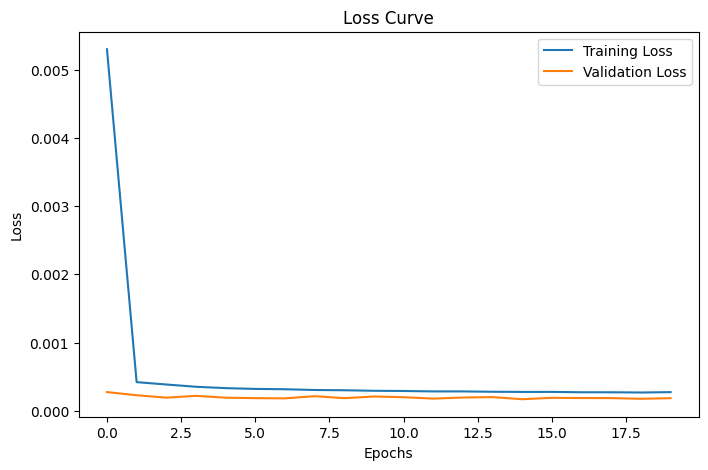

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


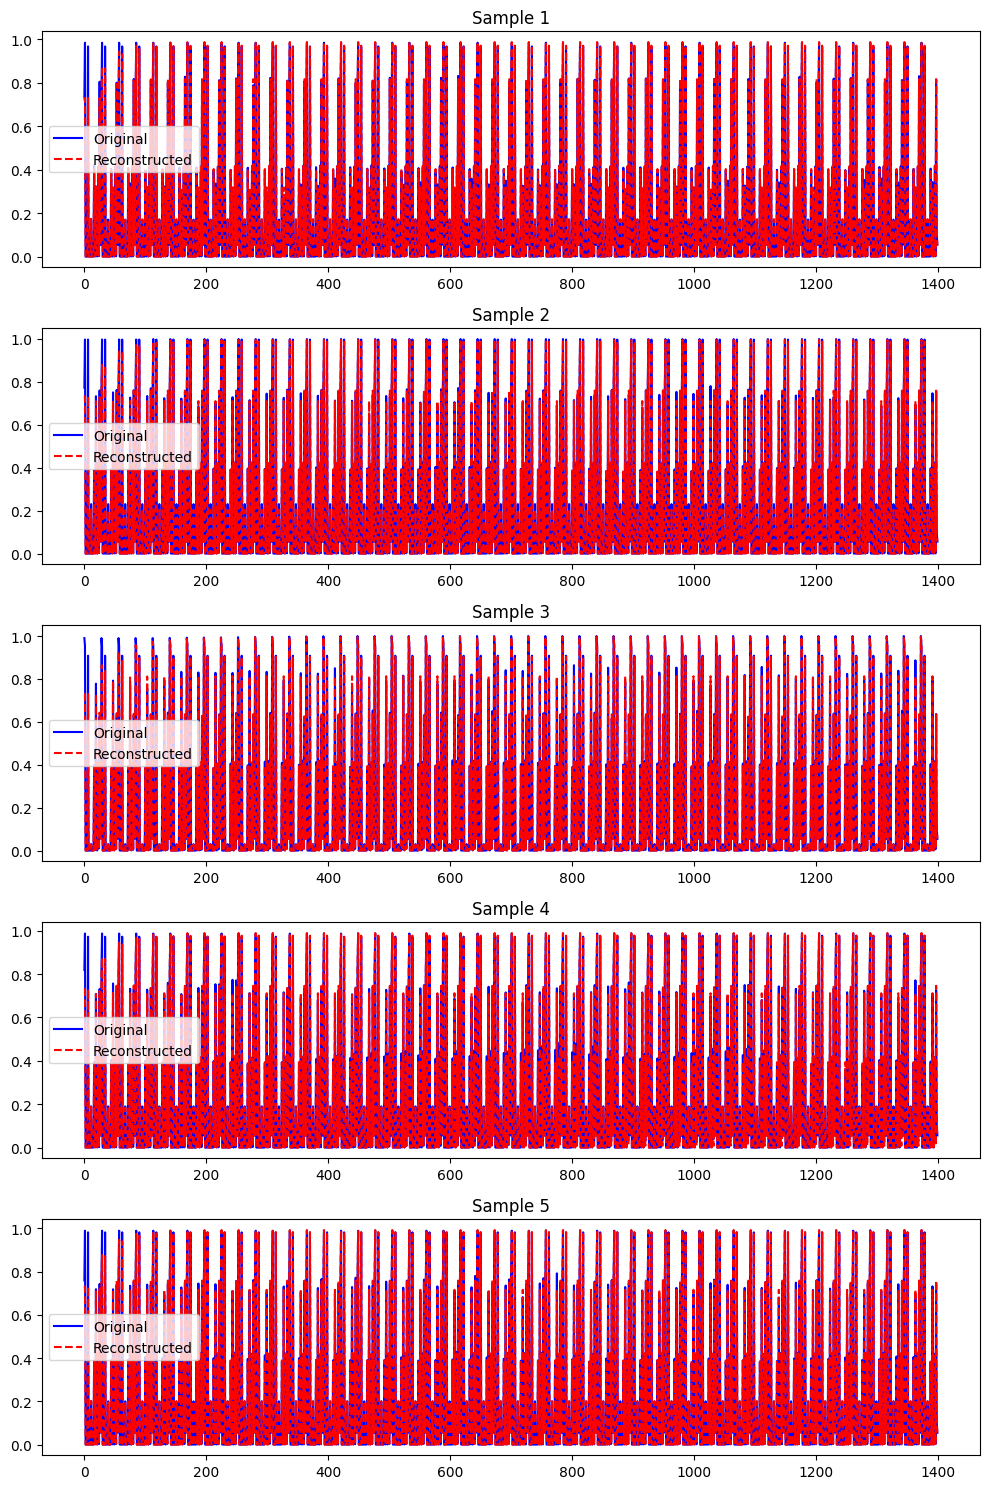

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras.optimizers import Adam

# Define model parameters
seq_length_short = 50
encoding_dim = 32

# Prepare data
sensor_data_scaled_first_10000 = sensor_data_scaled.drop(['timestamp', 'activityID', 'activity_name'], axis=1)
X_seq_all = create_sequences(sensor_data_scaled_first_10000, seq_length_short)

# Extract dimensions
input_dim = X_seq_all.shape[2]
timesteps = X_seq_all.shape[1]

# Define autoencoder model
input_layer = Input(shape=(timesteps, input_dim))
encoded = LSTM(encoding_dim, activation='relu', return_sequences=False)(input_layer)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, activation='sigmoid', return_sequences=True)(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = autoencoder.fit(
    X_seq_all, X_seq_all,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Visualizing original vs reconstructed sequences
n_samples = 5  # Number of samples to visualize
sample_idx = np.random.choice(X_seq_all.shape[0], n_samples, replace=False)
X_sample = X_seq_all[sample_idx]
X_reconstructed = autoencoder.predict(X_sample)

# Plot some sequences
fig, axes = plt.subplots(n_samples, 1, figsize=(10, n_samples * 3))
for i in range(n_samples):
    axes[i].plot(X_sample[i].reshape(-1), label='Original', color='blue')
    axes[i].plot(X_reconstructed[i].reshape(-1), label='Reconstructed', linestyle='dashed', color='red')
    axes[i].set_title(f'Sample {i+1}')
    axes[i].legend()
plt.tight_layout()
plt.show()

477/780 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Total anomalies (point detection): 1248


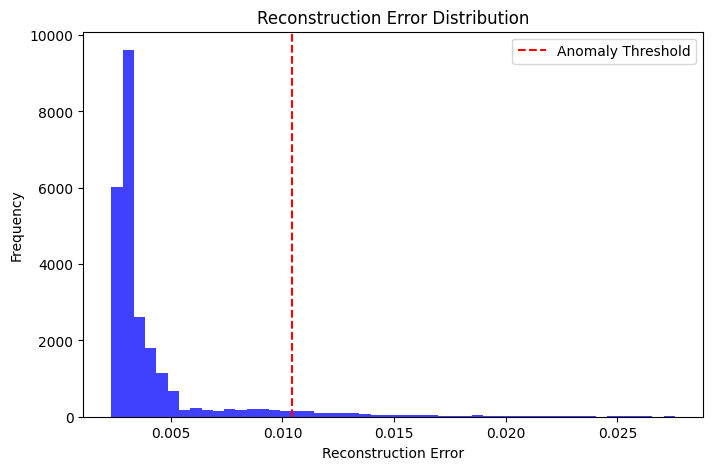

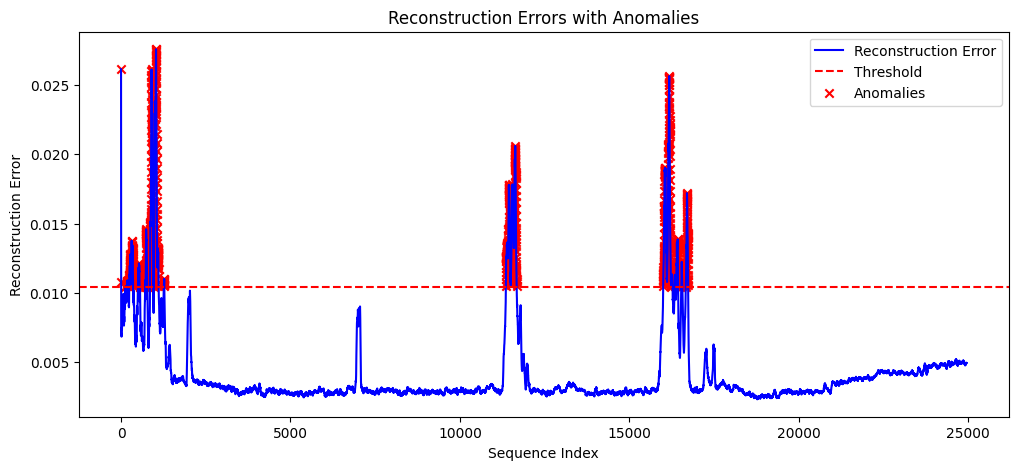

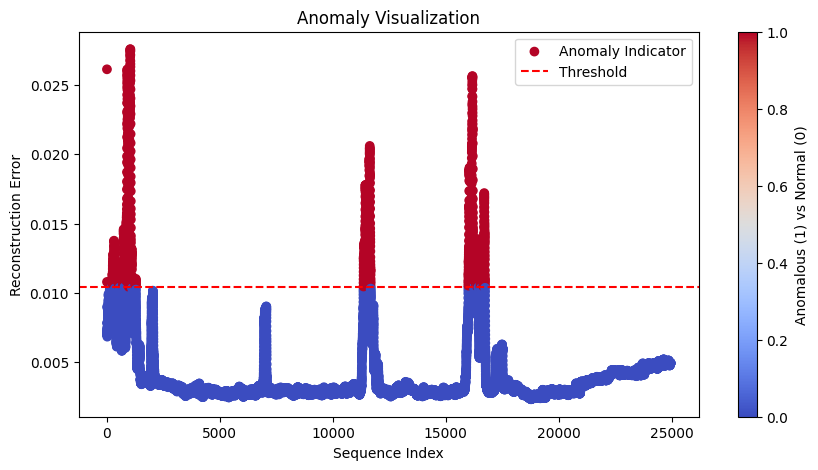

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain reconstruction error
X_pred_all = autoencoder.predict(X_seq_all)
reconstruction_error_all = np.mean(np.abs(X_pred_all - X_seq_all), axis=(1, 2))

# Set anomaly threshold at 95th percentile
threshold_all = np.percentile(reconstruction_error_all, 95)
anomalies_all = reconstruction_error_all > threshold_all

# Print total anomalies
print(f"Total anomalies (point detection): {np.sum(anomalies_all)}")

# Visualization: Reconstruction Error Distribution
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error_all, bins=50, alpha=0.75, color='blue')
plt.axvline(threshold_all, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.show()

# Visualization: Anomaly Detection Over Time
plt.figure(figsize=(12, 5))
plt.plot(reconstruction_error_all, label='Reconstruction Error', color='blue')
plt.axhline(threshold_all, color='red', linestyle='dashed', label='Threshold')
plt.scatter(np.where(anomalies_all)[0], reconstruction_error_all[anomalies_all], color='red', label='Anomalies', marker='x')
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Errors with Anomalies")
plt.legend()
plt.show()

# Visualization: Highlighting Anomalous Sequences
plt.figure(figsize=(10, 5))
plt.scatter(range(len(reconstruction_error_all)), reconstruction_error_all, c=anomalies_all, cmap='coolwarm', label="Anomaly Indicator")
plt.axhline(threshold_all, color='red', linestyle='dashed', label='Threshold')
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.title("Anomaly Visualization")
plt.colorbar(label="Anomalous (1) vs Normal (0)")
plt.legend()
plt.show()

# LSTM & Transformer Autoencoders for Sequential & Periodic Context

Epoch 1/20


499/499 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0228 - val_loss: 9.7743e-04
Epoch 2/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 4.6636e-04 - val_loss: 9.7836e-04
Epoch 3/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 3.8639e-04 - val_loss: 7.3502e-04
Epoch 4/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 3.5417e-04 - val_loss: 6.8189e-04
Epoch 5/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 3.3115e-04 - val_loss: 6.5129e-04
Epoch 6/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 3.1857e-04 - val_loss: 6.4434e-04
Epoch 7/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 3.0977e-04 - val_loss: 7.7831e-04
Epoch 8/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 3.1029e-04 - val_loss: 5.9890e-04
Epoch 9/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 2.9885e-04 - val_loss: 6.2535e-04
Epoch 10/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 2.9171e-04 - val_loss: 5.7926e-04
Epoch 11/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step

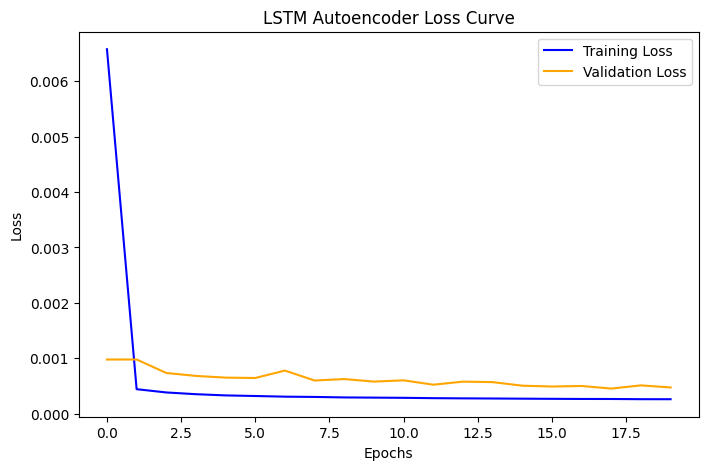

624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


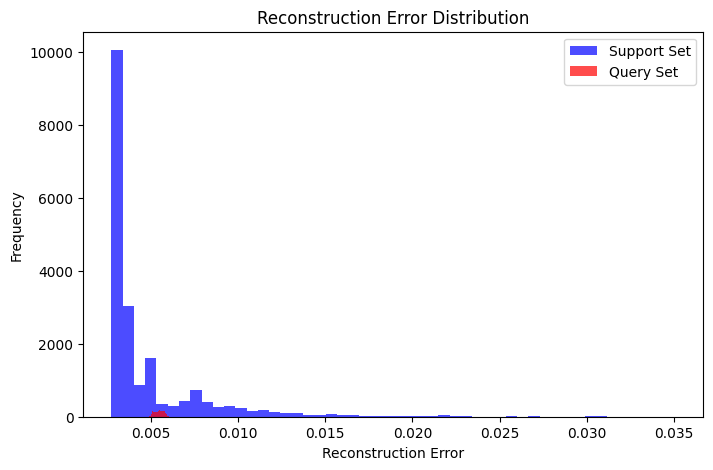

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


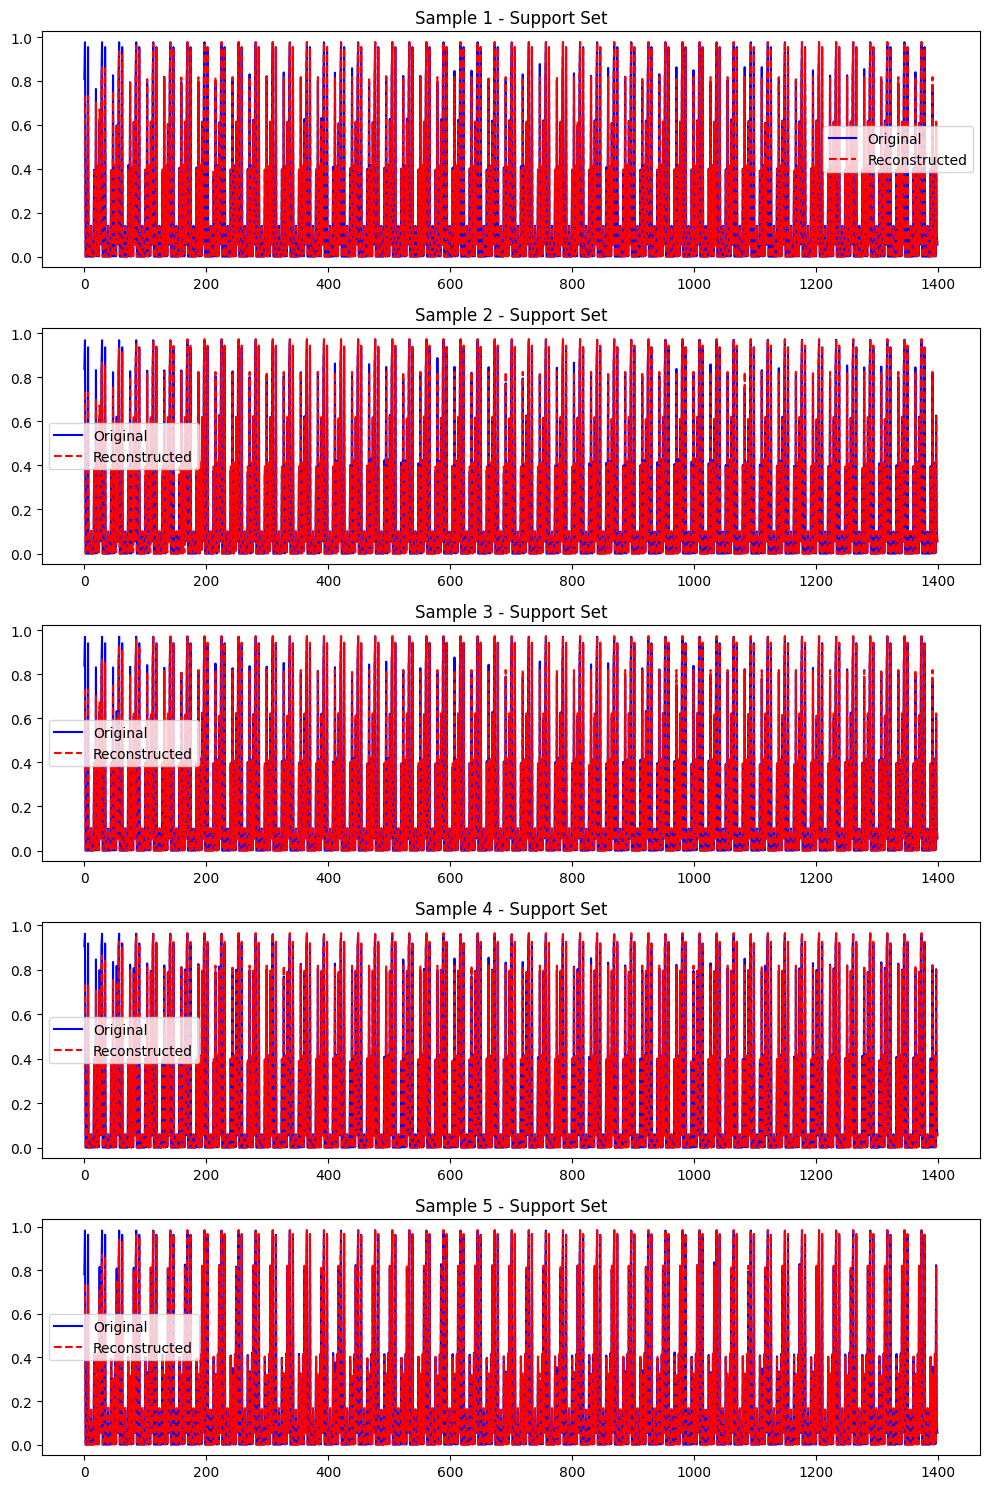

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras.optimizers import Adam

# Prepare LSTM autoencoder for sequential pass
X_seq_support_lstm = create_sequences(support_features, seq_length_short)
X_seq_query_lstm = create_sequences(query_features, seq_length_short)

# Extract dimensions
input_dim_lstm = X_seq_support_lstm.shape[2]
timesteps_lstm = X_seq_support_lstm.shape[1]

# Define LSTM autoencoder model
input_layer_lstm = Input(shape=(timesteps_lstm, input_dim_lstm))
encoded_lstm = LSTM(encoding_dim, activation='relu', return_sequences=False)(input_layer_lstm)
decoded_lstm = RepeatVector(timesteps_lstm)(encoded_lstm)
decoded_lstm = LSTM(input_dim_lstm, activation='sigmoid', return_sequences=True)(decoded_lstm)

autoencoder_lstm = Model(input_layer_lstm, decoded_lstm)
autoencoder_lstm.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history_lstm = autoencoder_lstm.fit(
    X_seq_support_lstm, X_seq_support_lstm,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(history_lstm.history['loss'], label='Training Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Autoencoder Loss Curve')
plt.legend()
plt.show()

# Obtain reconstruction error for support set
X_pred_support = autoencoder_lstm.predict(X_seq_support_lstm)
reconstruction_error_support = np.mean(np.abs(X_pred_support - X_seq_support_lstm), axis=(1, 2))

# Obtain reconstruction error for query set
X_pred_query = autoencoder_lstm.predict(X_seq_query_lstm)
reconstruction_error_query = np.mean(np.abs(X_pred_query - X_seq_query_lstm), axis=(1, 2))

# Histogram of reconstruction errors
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error_support, bins=50, alpha=0.7, label='Support Set', color='blue')
plt.hist(reconstruction_error_query, bins=50, alpha=0.7, label='Query Set', color='red')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()

# Visualization: Original vs. Reconstructed Sequences
n_samples = 5
sample_idx = np.random.choice(X_seq_support_lstm.shape[0], n_samples, replace=False)
X_sample = X_seq_support_lstm[sample_idx]
X_reconstructed = autoencoder_lstm.predict(X_sample)

fig, axes = plt.subplots(n_samples, 1, figsize=(10, n_samples * 3))
for i in range(n_samples):
    axes[i].plot(X_sample[i].reshape(-1), label='Original', color='blue')
    axes[i].plot(X_reconstructed[i].reshape(-1), label='Reconstructed', linestyle='dashed', color='red')
    axes[i].set_title(f'Sample {i+1} - Support Set')
    axes[i].legend()
plt.tight_layout()
plt.show()

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Anomalies (LSTM, short window, query set): 248


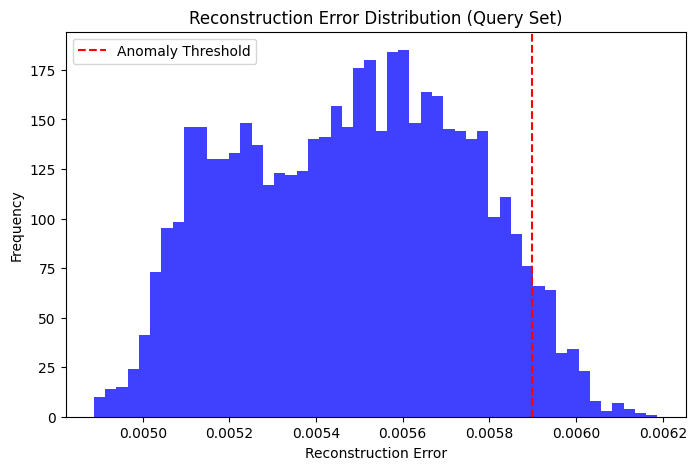

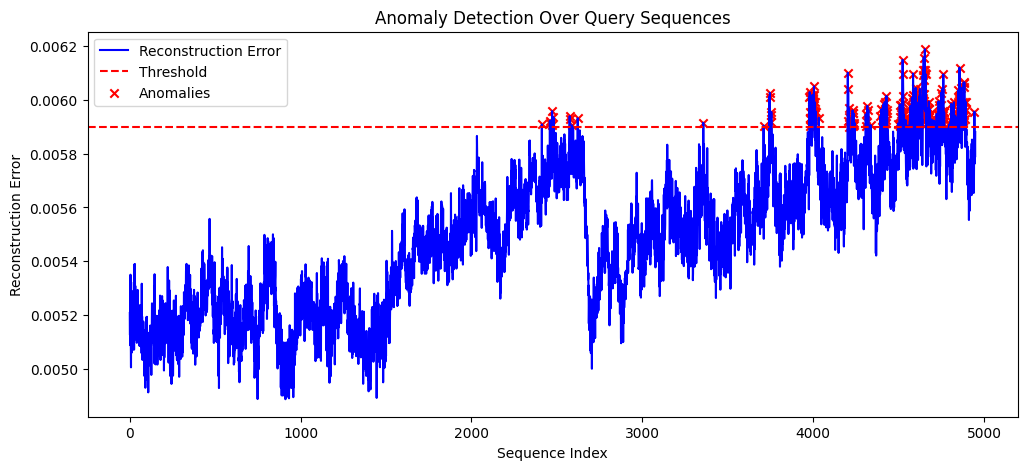

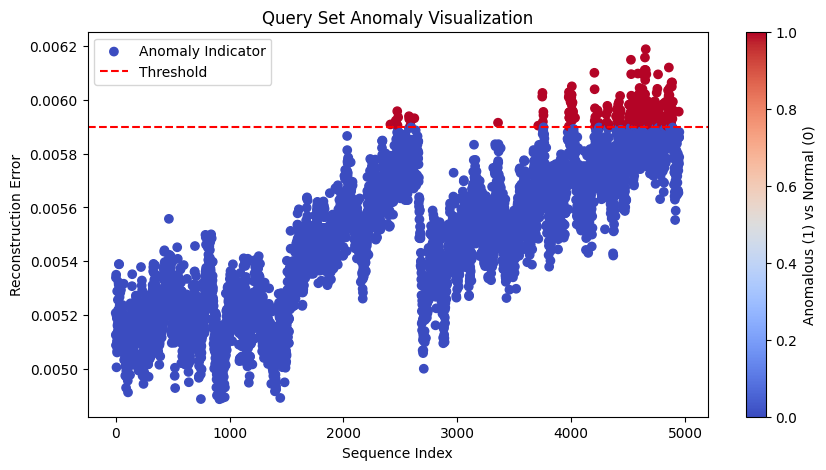

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain predictions on query set
X_seq_query_pred_lstm = autoencoder_lstm.predict(X_seq_query_lstm)

# Compute reconstruction error
reconstruction_error_lstm = np.mean(np.abs(X_seq_query_pred_lstm - X_seq_query_lstm), axis=(1, 2))

# Set anomaly detection threshold (95th percentile)
threshold_lstm = np.percentile(reconstruction_error_lstm, 95)
anomalies_lstm = reconstruction_error_lstm > threshold_lstm

# Print total anomalies detected
print(f"Anomalies (LSTM, short window, query set): {np.sum(anomalies_lstm)}")

# Visualization 1: Histogram of Reconstruction Errors
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error_lstm, bins=50, alpha=0.75, color='blue')
plt.axvline(threshold_lstm, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Query Set)")
plt.legend()
plt.show()

# Visualization 2: Reconstruction Errors Over Time
plt.figure(figsize=(12, 5))
plt.plot(reconstruction_error_lstm, label='Reconstruction Error', color='blue')
plt.axhline(threshold_lstm, color='red', linestyle='dashed', label='Threshold')
plt.scatter(np.where(anomalies_lstm)[0], reconstruction_error_lstm[anomalies_lstm], color='red', label='Anomalies', marker='x')
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.title("Anomaly Detection Over Query Sequences")
plt.legend()
plt.show()

# Visualization 3: Scatter Plot Highlighting Anomalies
plt.figure(figsize=(10, 5))
plt.scatter(range(len(reconstruction_error_lstm)), reconstruction_error_lstm, c=anomalies_lstm, cmap='coolwarm', label="Anomaly Indicator")
plt.axhline(threshold_lstm, color='red', linestyle='dashed', label='Threshold')
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.title("Query Set Anomaly Visualization")
plt.colorbar(label="Anomalous (1) vs Normal (0)")
plt.legend()
plt.show()

In [16]:
# Periodic pass using a Transformer autoencoder
seq_length_long = 100
def create_sequences_long(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i+seq_length].values)
    return np.array(sequences)

X_seq_support_transformer = create_sequences_long(support_features, seq_length_long)
X_seq_query_transformer = create_sequences_long(query_features, seq_length_long)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Define Transformer Autoencoder
def build_transformer_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Transformer Encoder
    encoder = layers.MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    encoder = layers.LayerNormalization()(encoder)
    encoder = layers.GlobalAveragePooling1D()(encoder)
    
    # LSTM Decoder
    decoder = layers.RepeatVector(input_shape[0])(encoder)
    decoder = layers.LSTM(128, return_sequences=True)(decoder)
    decoder = layers.Dense(input_shape[1], activation='linear')(decoder)
    
    model = tf.keras.Model(inputs, decoder)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize and train the model
input_shape_transformer = (seq_length_long, X_seq_support_transformer.shape[2])
transformer_model = build_transformer_autoencoder(input_shape_transformer)

history_transformer = transformer_model.fit(
    X_seq_support_transformer, X_seq_support_transformer,
    epochs=20, batch_size=64, validation_split=0.2, verbose=1
)


Epoch 1/20
 56/249 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - loss: 0.0314

249/249 ━━━━━━━━━━━━━━━━━━━━ 28s 105ms/step - loss: 0.0112 - val_loss: 9.5624e-04
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - loss: 4.3411e-04 - val_loss: 5.0889e-04
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - loss: 2.2010e-04 - val_loss: 4.1043e-04
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - loss: 1.8215e-04 - val_loss: 3.8384e-04
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - loss: 1.6762e-04 - val_loss: 3.7276e-04
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - loss: 1.6282e-04 - val_loss: 3.9545e-04
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - loss: 1.6802e-04 - val_loss: 3.5587e-04
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - loss: 1.7056e-04 - val_loss: 3.4260e-04
Epoch 9/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - loss: 1.6952e-04 - val_loss: 3.3691e-04
Epoch 10/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - loss: 1.7152e-04 - val_loss: 3.3944e-04
Epoch 11/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s

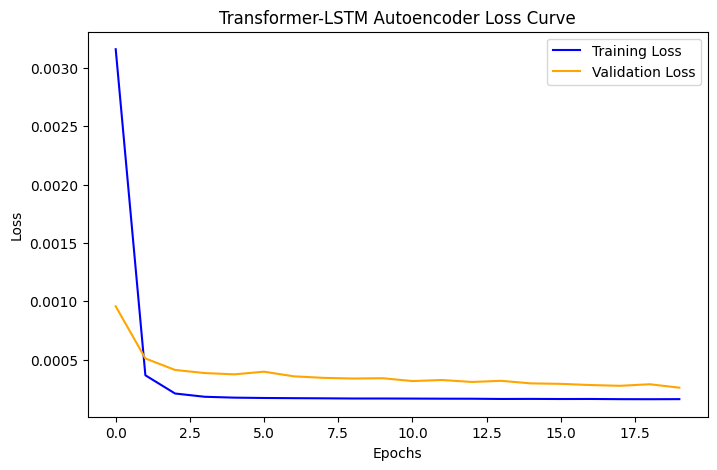

622/622 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step


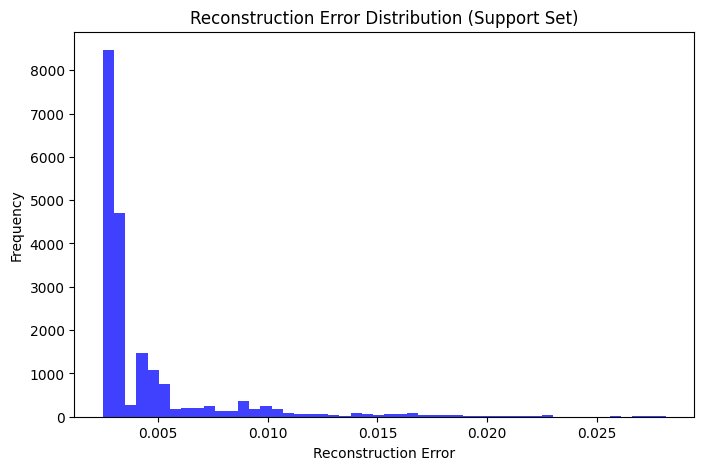

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


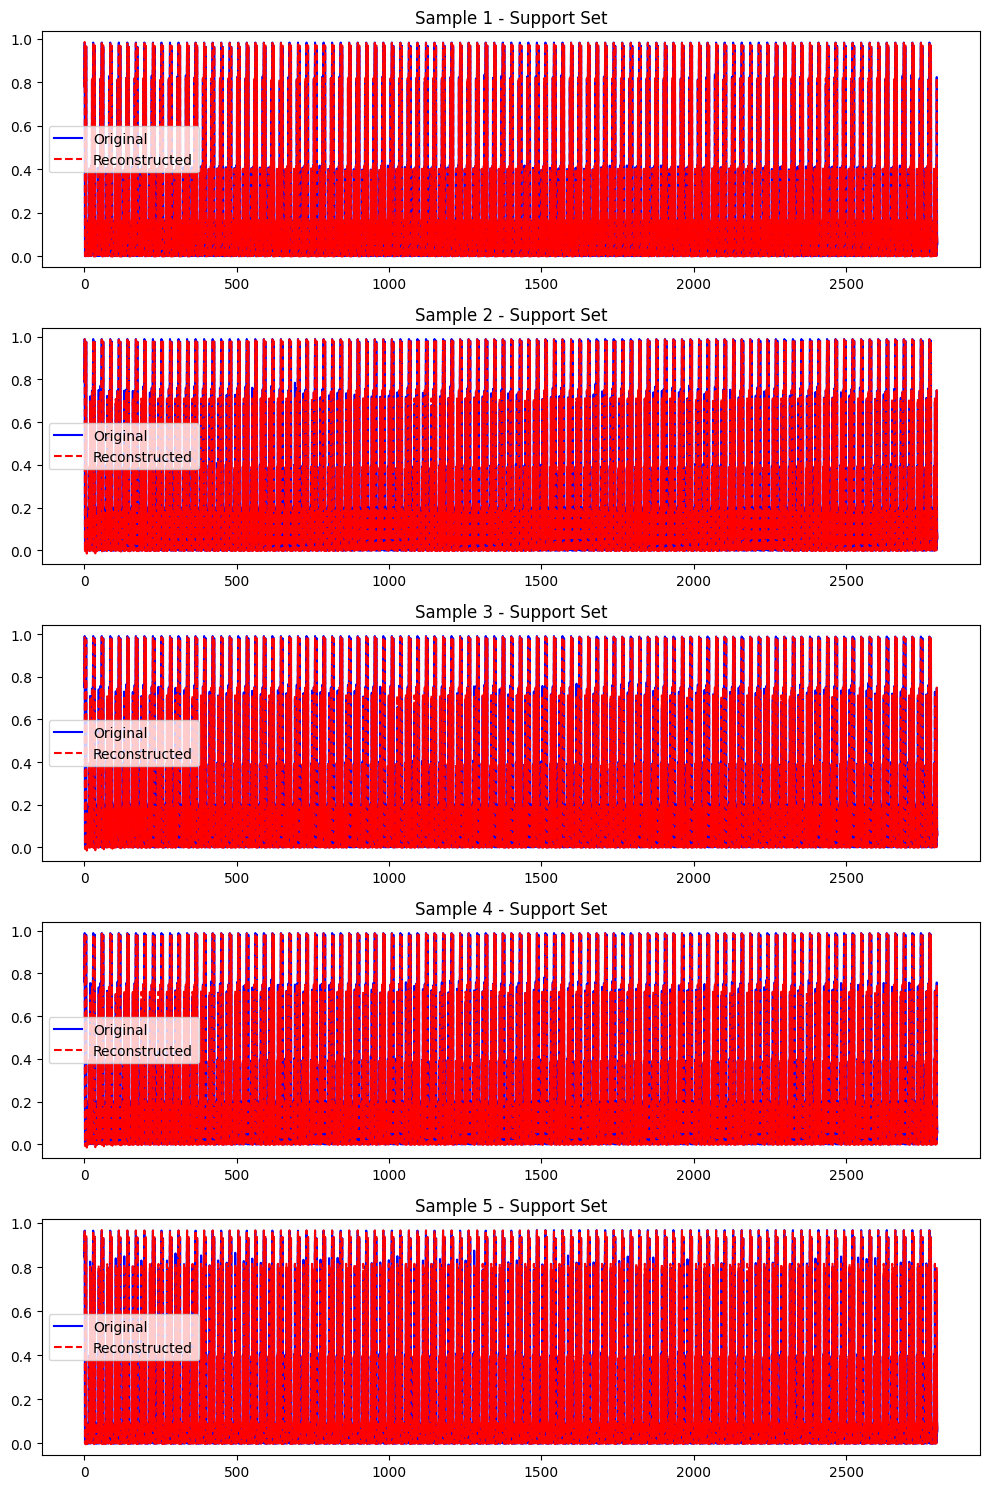

In [18]:
# Plot Training Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history_transformer.history['loss'], label='Training Loss', color='blue')
plt.plot(history_transformer.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Transformer-LSTM Autoencoder Loss Curve')
plt.legend()
plt.show()

# Obtain reconstruction error
X_seq_support_pred = transformer_model.predict(X_seq_support_transformer)
reconstruction_error_transformer = np.mean(np.abs(X_seq_support_pred - X_seq_support_transformer), axis=(1, 2))

# Histogram of Reconstruction Errors
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error_transformer, bins=50, alpha=0.75, color='blue')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Support Set)")
plt.show()

# Visualizing Original vs. Reconstructed Sequences
n_samples = 5
sample_idx = np.random.choice(X_seq_support_transformer.shape[0], n_samples, replace=False)
X_sample = X_seq_support_transformer[sample_idx]
X_reconstructed = transformer_model.predict(X_sample)

fig, axes = plt.subplots(n_samples, 1, figsize=(10, n_samples * 3))
for i in range(n_samples):
    axes[i].plot(X_sample[i].reshape(-1), label='Original', color='blue')
    axes[i].plot(X_reconstructed[i].reshape(-1), label='Reconstructed', linestyle='dashed', color='red')
    axes[i].set_title(f'Sample {i+1} - Support Set')
    axes[i].legend()
plt.tight_layout()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain predictions on the query set
X_seq_query_pred_transformer = transformer_model.predict(X_seq_query_transformer)

# Compute reconstruction error
reconstruction_error_transformer = np.mean(np.abs(X_seq_query_pred_transformer - X_seq_query_transformer), axis=(1, 2))

# Set anomaly detection threshold (95th percentile)
threshold_transformer = np.percentile(reconstruction_error_transformer, 95)
anomalies_transformer = reconstruction_error_transformer > threshold_transformer

# Print total anomalies detected
print(f"Anomalies (Transformer, long window, query set): {np.sum(anomalies_transformer)}")

154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
Anomalies (Transformer, long window, query set): 245


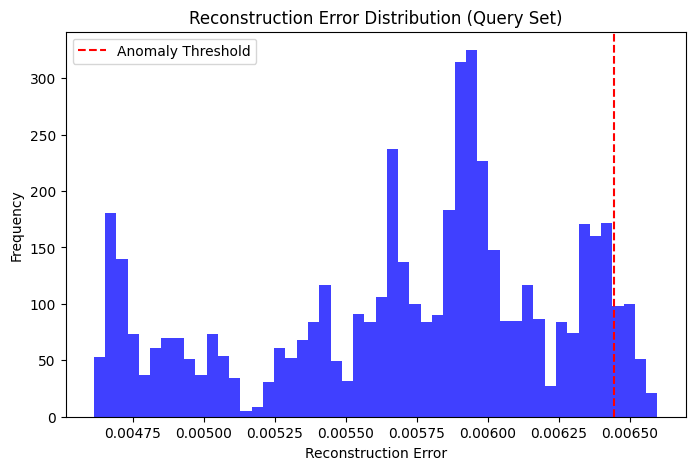

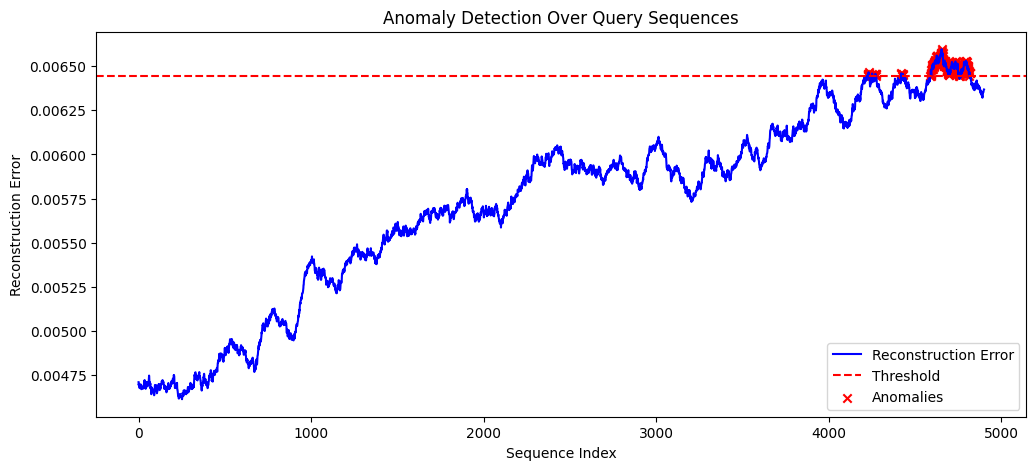

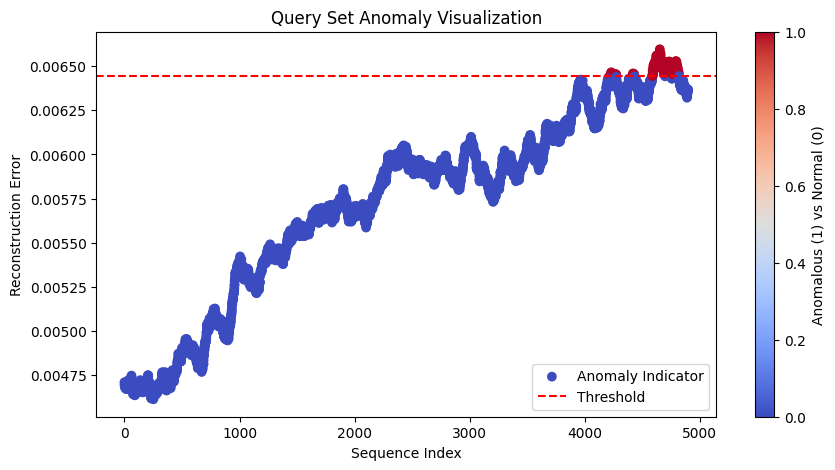

In [20]:
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error_transformer, bins=50, alpha=0.75, color='blue')
plt.axvline(threshold_transformer, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Query Set)")
plt.legend()
plt.show()

# Visualization 2: Reconstruction Errors Over Time
plt.figure(figsize=(12, 5))
plt.plot(reconstruction_error_transformer, label='Reconstruction Error', color='blue')
plt.axhline(threshold_transformer, color='red', linestyle='dashed', label='Threshold')
plt.scatter(np.where(anomalies_transformer)[0], reconstruction_error_transformer[anomalies_transformer], color='red', label='Anomalies', marker='x')
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.title("Anomaly Detection Over Query Sequences")
plt.legend()
plt.show()

# Visualization 3: Scatter Plot Highlighting Anomalies
plt.figure(figsize=(10, 5))
plt.scatter(range(len(reconstruction_error_transformer)), reconstruction_error_transformer, c=anomalies_transformer, cmap='coolwarm', label="Anomaly Indicator")
plt.axhline(threshold_transformer, color='red', linestyle='dashed', label='Threshold')
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.title("Query Set Anomaly Visualization")
plt.colorbar(label="Anomalous (1) vs Normal (0)")
plt.legend()
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure the same length for aggregation
min_len = min(len(reconstruction_error_lstm), len(reconstruction_error_transformer))
combined_reconstruction_error = reconstruction_error_lstm[:min_len] + reconstruction_error_transformer[:min_len]

# Normalize the aggregated anomaly scores
combined_reconstruction_error_normalized = (combined_reconstruction_error - np.min(combined_reconstruction_error)) / (np.max(combined_reconstruction_error) - np.min(combined_reconstruction_error))

# Set threshold for final anomalies (80% percentile)
combined_threshold = 0.8
final_anomalies = combined_reconstruction_error_normalized > combined_threshold

# Convert anomalies into binary labels for DRL training
final_labels = final_anomalies.astype(np.int32)

# Print total anomalies detected
print(f"Final anomalies after aggregation: {np.sum(final_anomalies)}")

Final anomalies after aggregation: 616


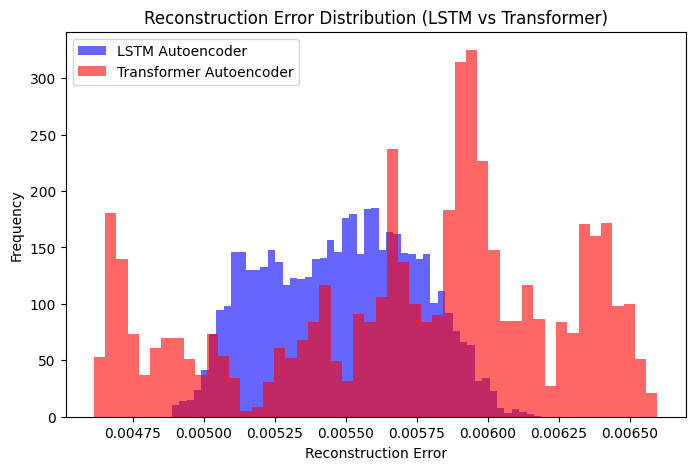

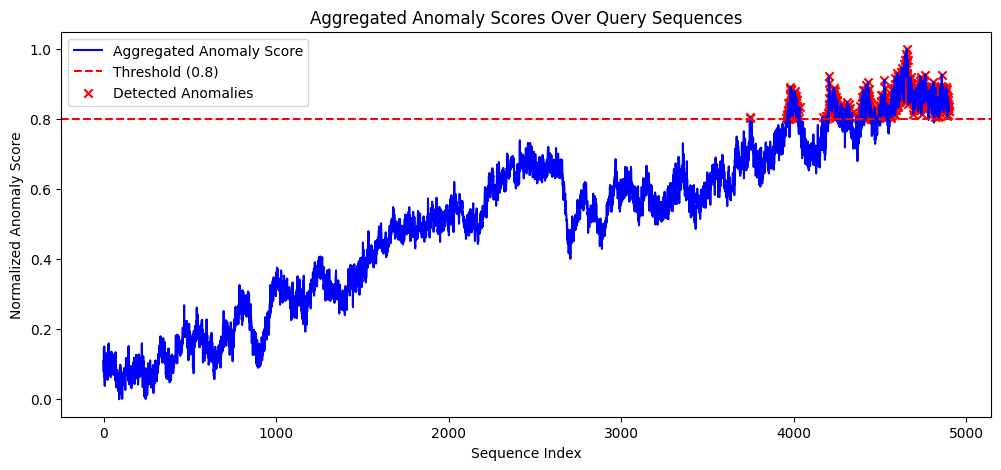

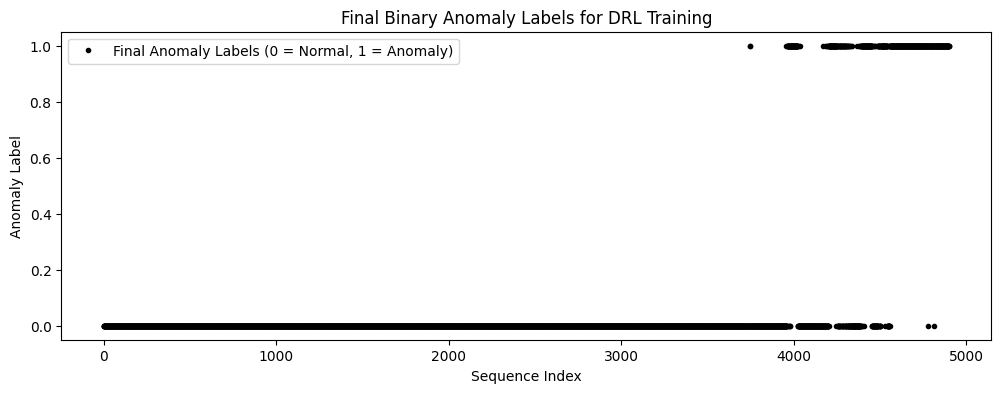

In [22]:
# 1. Visualization: Histogram of Reconstruction Errors
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error_lstm, bins=50, alpha=0.6, label="LSTM Autoencoder", color='blue')
plt.hist(reconstruction_error_transformer, bins=50, alpha=0.6, label="Transformer Autoencoder", color='red')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (LSTM vs Transformer)")
plt.legend()
plt.show()

# 2. Visualization: Aggregated Anomaly Scores Over Time
plt.figure(figsize=(12, 5))
plt.plot(combined_reconstruction_error_normalized, label="Aggregated Anomaly Score", color='blue')
plt.axhline(combined_threshold, color='red', linestyle='dashed', label="Threshold (0.8)")
plt.scatter(np.where(final_anomalies)[0], combined_reconstruction_error_normalized[final_anomalies], color='red', label="Detected Anomalies", marker='x')
plt.xlabel("Sequence Index")
plt.ylabel("Normalized Anomaly Score")
plt.title("Aggregated Anomaly Scores Over Query Sequences")
plt.legend()
plt.show()

# 3. Visualization: Binary Labels for DRL Training
plt.figure(figsize=(12, 4))
plt.plot(final_labels, label="Final Anomaly Labels (0 = Normal, 1 = Anomaly)", linestyle='None', marker='o', markersize=3, color='black')
plt.xlabel("Sequence Index")
plt.ylabel("Anomaly Label")
plt.title("Final Binary Anomaly Labels for DRL Training")
plt.legend()
plt.show()


# DRL-based Anomaly Detection

In [23]:
class AnomalyDetectionEnv(gym.Env):
    def __init__(self, errors, labels):
        super(AnomalyDetectionEnv, self).__init__()
        self.errors = errors
        self.labels = labels  
        self.current_idx = 0
        self.observation_space = spaces.Box(low=0.0, high=1.0, shape=(1,), dtype=np.float32)
        self.action_space = spaces.Discrete(2)

    def reset(self):
        self.current_idx = 0
        return np.array([self.errors[self.current_idx]], dtype=np.float32)

    def step(self, action):
        true_label = self.labels[self.current_idx]
        # Reward +1 for correct classification, -1 for misclassification
        reward = 1.0 if action == true_label else -1.0
        self.current_idx += 1
        done = self.current_idx >= len(self.errors)
        if not done:
            obs = np.array([self.errors[self.current_idx]], dtype=np.float32)
        else:
            obs = np.array([0.0], dtype=np.float32)
        return obs, reward, done, {}

In [24]:
# pip install seaborn

In [25]:
# pip install shimmy

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stable_baselines3 import DQN
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define the environment (Assuming AnomalyDetectionEnv is already implemented)
env = AnomalyDetectionEnv(combined_reconstruction_error_normalized[:min_len], final_labels)

# DRL Training with DQN
model = DQN("MlpPolicy", env, verbose=1,
            learning_rate=5e-4,
            buffer_size=50000,
            exploration_fraction=0.1,
            learning_starts=1000,
            target_update_interval=100,
            batch_size=32)

# Train the model
model.learn(total_timesteps=15000)

# Test the trained model
obs = env.reset()
drl_actions = []
while True:
    action, _ = model.predict(obs, deterministic=True)
    drl_actions.append(action)
    obs, _, done, _ = env.step(action)
    if done:
        break

# Evaluate DQN performance
true_labels = final_labels[:len(drl_actions)]
accuracy = np.mean(np.array(drl_actions) == true_labels)
print(f"DQN agent accuracy on anomaly detection: {accuracy*100:.2f}%")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


DQN agent accuracy on anomaly detection: 97.20%


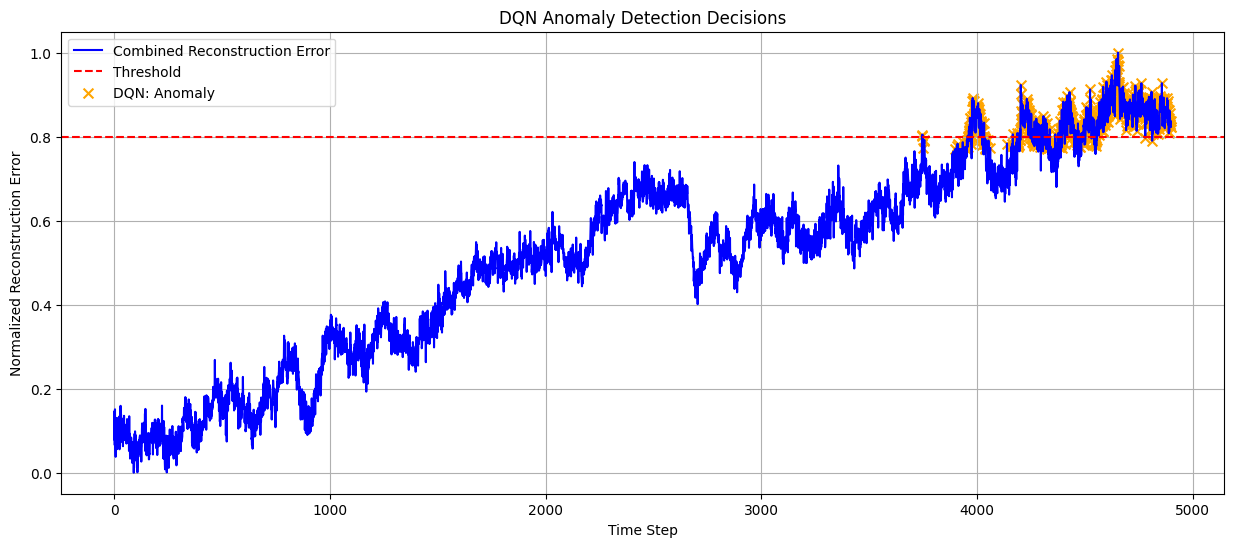

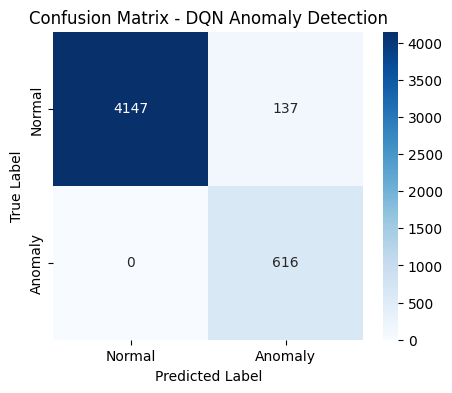

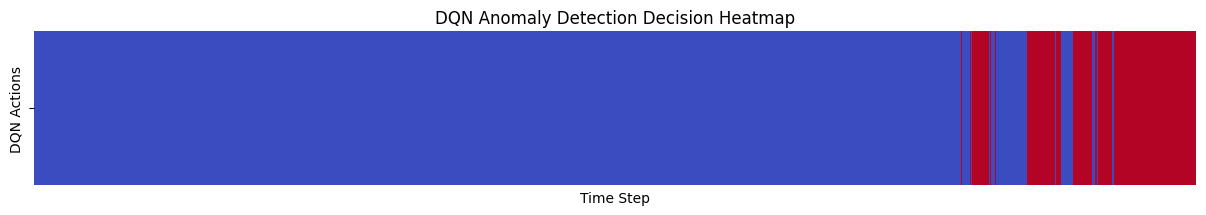

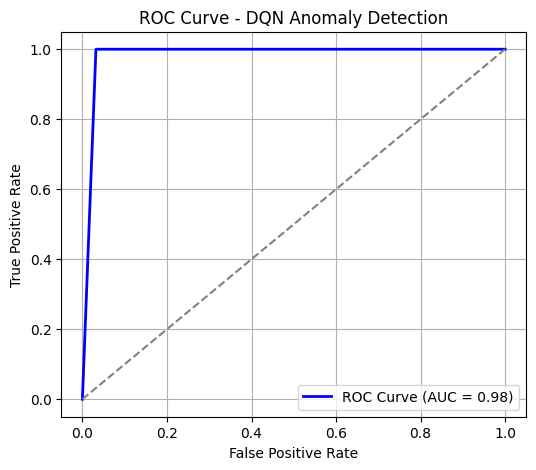

In [27]:
# Plot 1: DQN Anomaly Detection Decisions
plt.figure(figsize=(15, 6))
plt.plot(combined_reconstruction_error_normalized[:min_len], label='Combined Reconstruction Error', color='blue')
plt.axhline(y=combined_threshold, color='red', linestyle='--', label='Threshold')
plt.scatter(np.where(np.array(drl_actions) == 1)[0], 
            combined_reconstruction_error_normalized[:min_len][np.array(drl_actions) == 1],
            color='orange', marker='x', s=50, label='DQN: Anomaly')
plt.title('DQN Anomaly Detection Decisions')
plt.xlabel('Time Step')
plt.ylabel('Normalized Reconstruction Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Training Reward Curve (if available)
if "episode_rewards" in model.__dict__:
    plt.figure(figsize=(8, 5))
    plt.plot(model.__dict__["episode_rewards"], label="Episode Reward", color='blue')
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("DQN Training Reward Curve")
    plt.legend()
    plt.grid()
    plt.show()

# Plot 3: Confusion Matrix
cm = confusion_matrix(true_labels, drl_actions)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - DQN Anomaly Detection")
plt.show()

# Plot 4: Anomaly Detection Decision Heatmap
plt.figure(figsize=(15, 2))
sns.heatmap([drl_actions], cmap="coolwarm", cbar=False, xticklabels=False, yticklabels=["DQN Actions"])
plt.xlabel("Time Step")
plt.title("DQN Anomaly Detection Decision Heatmap")
plt.show()

# Plot 5: ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(true_labels, drl_actions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - DQN Anomaly Detection")
plt.legend()
plt.grid()
plt.show()

In [28]:
num_anomalies_detected = np.sum(np.array(drl_actions) == 1)
print(f"Total anomalies detected by the DQN agent: {num_anomalies_detected}")

Total anomalies detected by the DQN agent: 753
